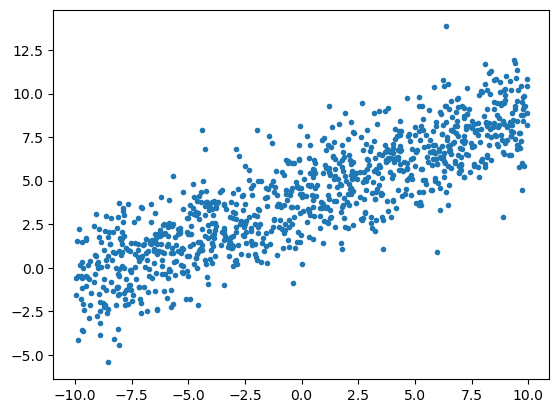

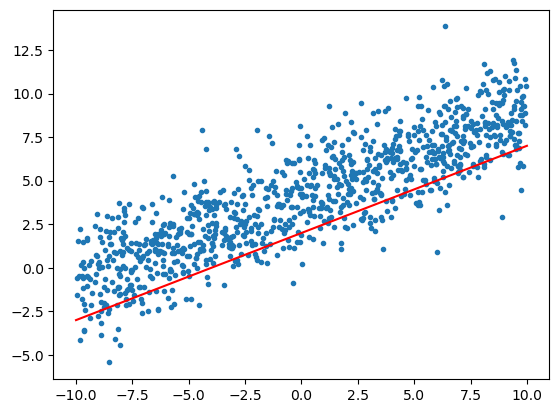

TypeError: '<' not supported between instances of 'ellipsis' and 'ellipsis'

In [ ]:
import numpy as np
import math
from numpy.random import default_rng
rng = default_rng()

import matplotlib.pyplot as plt

class Line2D:
    
    def __init__( self, a, b, noise_variance = 1 ):
        
        self.a = a
        self.b = b
        self.variance = noise_variance
        
    def generate_points(self, N):

        # Generate random X
        X = rng.uniform(-10, 10, N)
        
        # Generate random noise
        epsilon = rng.normal(0, math.sqrt(self.variance), N)
        
        # Calculate corresponding y
        y = self.a * X + self.b + epsilon
                
        return X, y
        
    def generate_dataset(self, N, ratio_train = 0.6):
        
        X_train , y_train = self.generate_points( int(N*ratio_train) )
        X_test , y_test = self.generate_points( N - int(N*ratio_train) )
        
        return (X_train, y_train), (X_test, y_test)
    
    def plot( self, X, y, predicted_a = None, predicted_b = None):
        
        plt.scatter(X, y, marker='.')

        x_start = -10
        x_end = 10

        if predicted_a and predicted_b:
          y_start = -10*predicted_a + predicted_b
          y_end = 10 * predicted_a + predicted_b
          plt.plot( (x_start, x_end), (y_start, y_end), 'r')
        plt.show()
        

data = Line2D( 0.5, 4, noise_variance= 3 )
X_vis, y_vis = data.generate_points(1000)
data.plot(X_vis, y_vis)
data.plot(X_vis, y_vis, predicted_a = 0.5, predicted_b = 2)

class LinearRegression:

    def __init__(self):
        
        self.estimated_a = 0
        self.estimated_b = 0
        
    def cost(self, X, y):
        y_pred = self.predict(X)
        calculated_cost = np.sum( (y_pred - y)**2)
        return calculated_cost
        
    def predict(self, X):
        y_pred = X * self.estimated_a + self.estimated_b
        return y_pred
    
    def evaluate(self, X_test, y_test):
        
        # Total Sum of Squares
        SS_tot = self.cost(X_test, y_test)
        
        # Mean squares
        MSE = SS_tot/len(X_test)
        
        return MSE
    
class RandomSearch(LinearRegression):
    
    def __init__(self, **kwargs):

      super().__init__(**kwargs)

      self.cost_history = []

    def fit(self, X, y, n_steps):

      best_a = self.estimated_a
      best_b = self.estimated_b

      for step in range(n_steps):
        # generate random estimated_a and estimated_b through uniform distribution, range -10 to 10
        self.estimated_a = ...
        self.estimated_b = ...

        cost = ...
        self.cost_history.append(cost)

        if min(self.cost_history) == cost:
          # update best_a and best_b
          pass

      self.estimated_a = best_a
      self.estimated_b = best_b
        
X_train, y_train = data.generate_points(10000)

rs = RandomSearch()
rs.fit(X_train, y_train, 10000)

X_test, y_test = data.generate_points(1000)
print(rs.estimated_a, rs.estimated_b)
print(rs.evaluate(X_test, y_test))

class GradientDescent(LinearRegression):
    
    def __init__(self, learning_rate):
        
        super().__init__()
        self.lr = learning_rate

    def fit(self, X, y, number_epochs ):
        
        cost_history = []
        
        for epoch in range(number_epochs):
            
            sum_x = np.sum(X)
            sum_y = np.sum(y)
            sum_xy = np.sum(X*y)
            sum_x_2 = np.sum(X*X)
            
            gradient_a = ...
            gradient_b = ...
            
            # update both parameters 
            self.estimated_a -= ...
            self.estimated_b -= ...
            
            cost = self.cost(X, y)
            cost_history.append(cost)
            
            if epoch%10 == 0:
              print(epoch, cost)
            
        return cost_history
    
X_train, y_train = data.generate_points(10000)
gd = GradientDescent(0.01)
gd.fit(X_train, y_train, 1000)

X_test, y_test = data.generate_points(1000)
print(gd.estimated_a, gd.estimated_b)
print(gd.evaluate(X_test, y_test))
